<a href="https://colab.research.google.com/github/Maath-Lima/data-science-studies/blob/main/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model

Carregar o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados


Text(0.5, 1.0, '9')

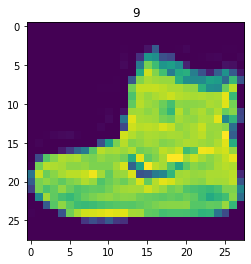

In [3]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [4]:
identificacoes_treino.min()
identificacoes_treino.max()

9

Visualizar as imagens com classificação


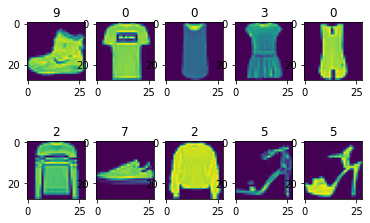

In [5]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])


Visualizar as imagens com a classificação nomeada


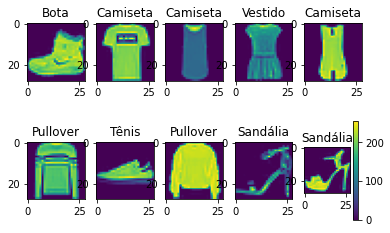

In [6]:
# Visualizar as imagens com a classificação nomeada
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.colorbar()

In [11]:
# Normalização
imagens_treino= imagens_treino/float(255)

modelo = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(256, activation=tensorflow.nn.relu),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(10, activation=tensorflow.nn.softmax)                 
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0942 - accuracy: 0.6433 - val_loss: 0.7017 - val_accuracy: 0.7501
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6593 - accuracy: 0.7595 - val_loss: 0.5940 - val_accuracy: 0.7861
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5820 - accuracy: 0.7897 - val_loss: 0.5410 - val_accuracy: 0.8065
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5380 - accuracy: 0.8048 - val_loss: 0.5118 - val_accuracy: 0.8163
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5067 - accuracy: 0.8183 - val_loss: 0.4810 - val_accuracy: 0.8288


In [19]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

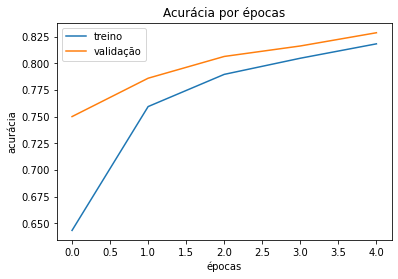

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Acurácia por épocas')

plt.xlabel('épocas')
plt.ylabel('acurácia')

plt.legend(['treino', 'validação'])

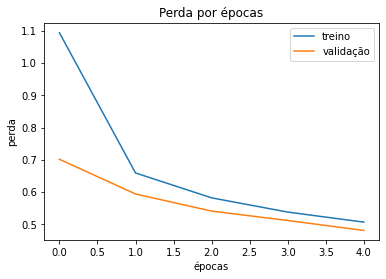

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')

plt.xlabel('épocas')
plt.ylabel('perda')

plt.legend(['treino', 'validação'])

In [14]:
perde_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print('Perda do teste:', perde_teste)
print('Acurácia do teste:', acuracia_teste)

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)



313/313 [==============================] - 1s 2ms/step - loss: 19217.7715 - accuracy: 0.7082
Perda do teste: 19217.771484375
Acurácia do teste: 0.7081999778747559
